d:\Basic_principles_of_Artificial_intelligence\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       298
           1       0.50      0.56      0.53       102

    accuracy                           0.74       400
   macro avg       0.67      0.68      0.68       400
weighted avg       0.76      0.74      0.75       400



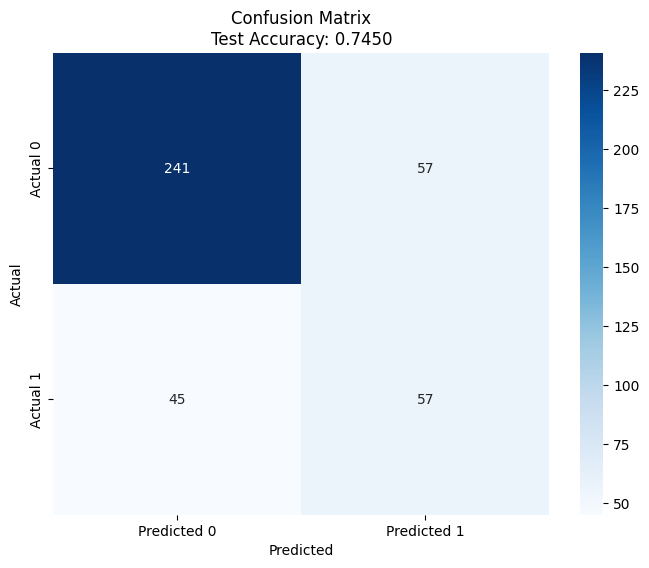

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # เพิ่ม seaborn สำหรับทำ Heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix # เพิ่ม confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# 0. Parameter ปรับแต่งได้ตรงนี้
LEARNING_RATE = 0.1
MAX_EPOCHS = 100
BATCH_SIZE = 128
THREADHOLD = 0.5
HIDDEN_UNITS_L1 = 16 
HIDDEN_UNITS_L2 = 32 
# 1. เตรียมข้อมูล (ใช้ไฟล์เดิมของคุณ)
df = pd.read_csv('../data/updated_cleaned_patient_data.csv')
df = df.fillna(df.mean())
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. สร้างและเทรนโมเดล
model = models.Sequential([
    layers.Dense(HIDDEN_UNITS_L2, activation='sigmoid', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.7),
    layers.Dense(HIDDEN_UNITS_L2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=0
)
 # เทรนแบบเงียบๆ เพื่อรอแสดงผลตอนท้าย

# ==========================================
# 3. ส่วนการสร้างพล็อตแบบที่คุณต้องการ
# ==========================================

# ทายผลข้อมูลทดสอบ
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > THREADHOLD).astype("int32")

# --- ส่วนที่ 1: พิมพ์ Classification Report (ตารางค่าสถิติ) ---
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred))
print("="*60)

# --- ส่วนที่ 2: วาด Confusion Matrix (ตารางความร้อนแบบในรูป) ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))

# ใช้ Seaborn วาด Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

# ตกแต่งหัวข้อและแกน (ตามรูปที่คุณส่งมา)
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
plt.title(f'Confusion Matrix\nTest Accuracy: {test_accuracy:.4f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

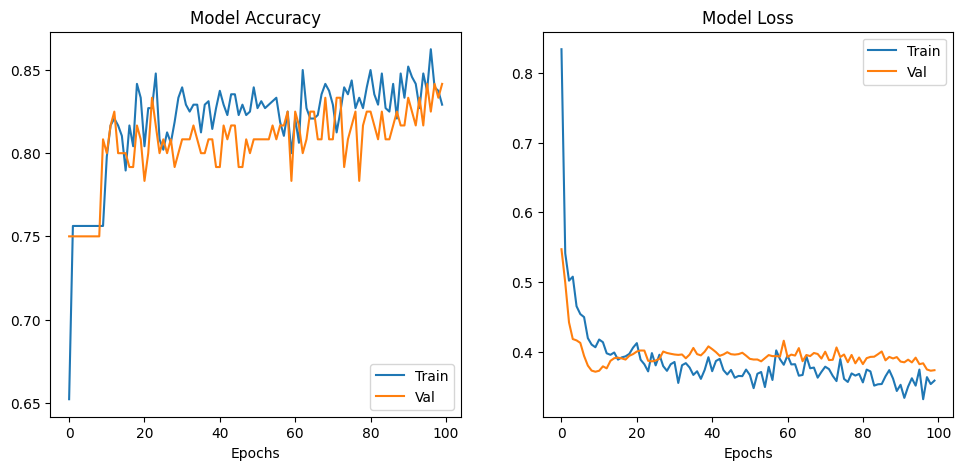

In [69]:
# --- พล็อต กราฟ 3 ส่วน (Loss, Accuracy, Confusion Matrix) ---
plt.figure(figsize=(18, 5))
# กราฟ Accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.legend()

# กราฟ Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.legend()